## SVM for Binary Classification

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from zipfile import ZipFile

### Download Dataset

In [ ]:
!kaggle datasets download uciml/mushroom-classification

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1734, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [ ]:
with ZipFile("mushroom-classification.zip", "r") as obj:
  obj.extractall()

In [ ]:
data = pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Each column is categorically encoded. Using label encoder to encode in numbers

In [ ]:
encoder = LabelEncoder()
for col in data.columns:
  data[col] = encoder.fit_transform(data[col])

### Corelation Heatmap

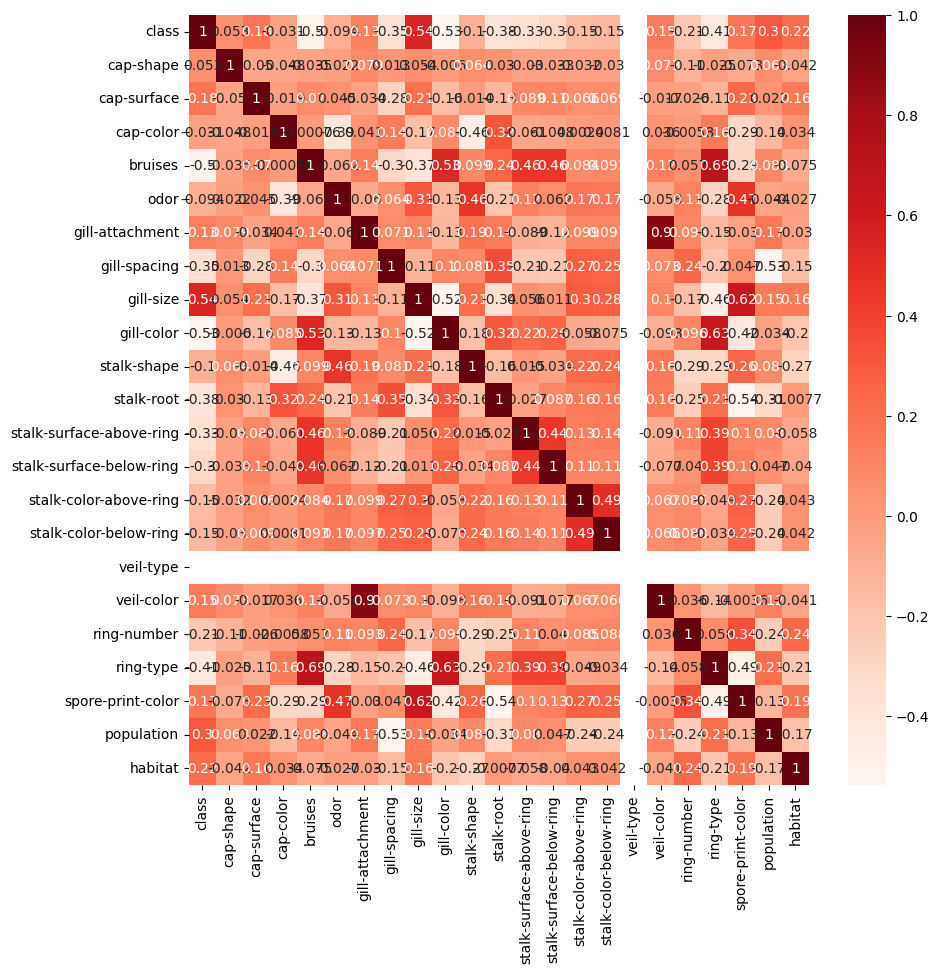

In [ ]:
cor = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig('correlation_heatmap.png')
plt.show()

#### Gill Size is highly correlated

### Checking Class Imbalance

<Axes: xlabel='class', ylabel='Count'>

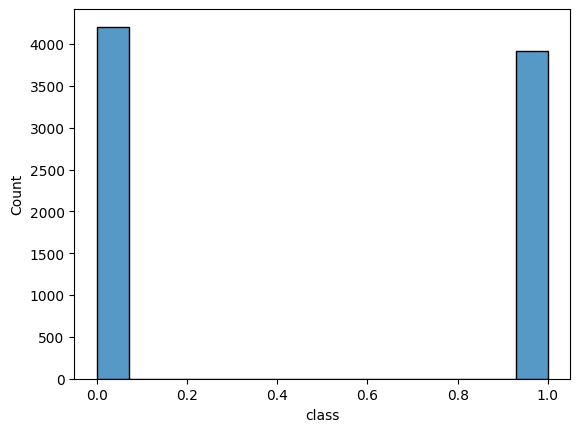

In [ ]:
sns.histplot(data["class"])

#### No Class Imbalance

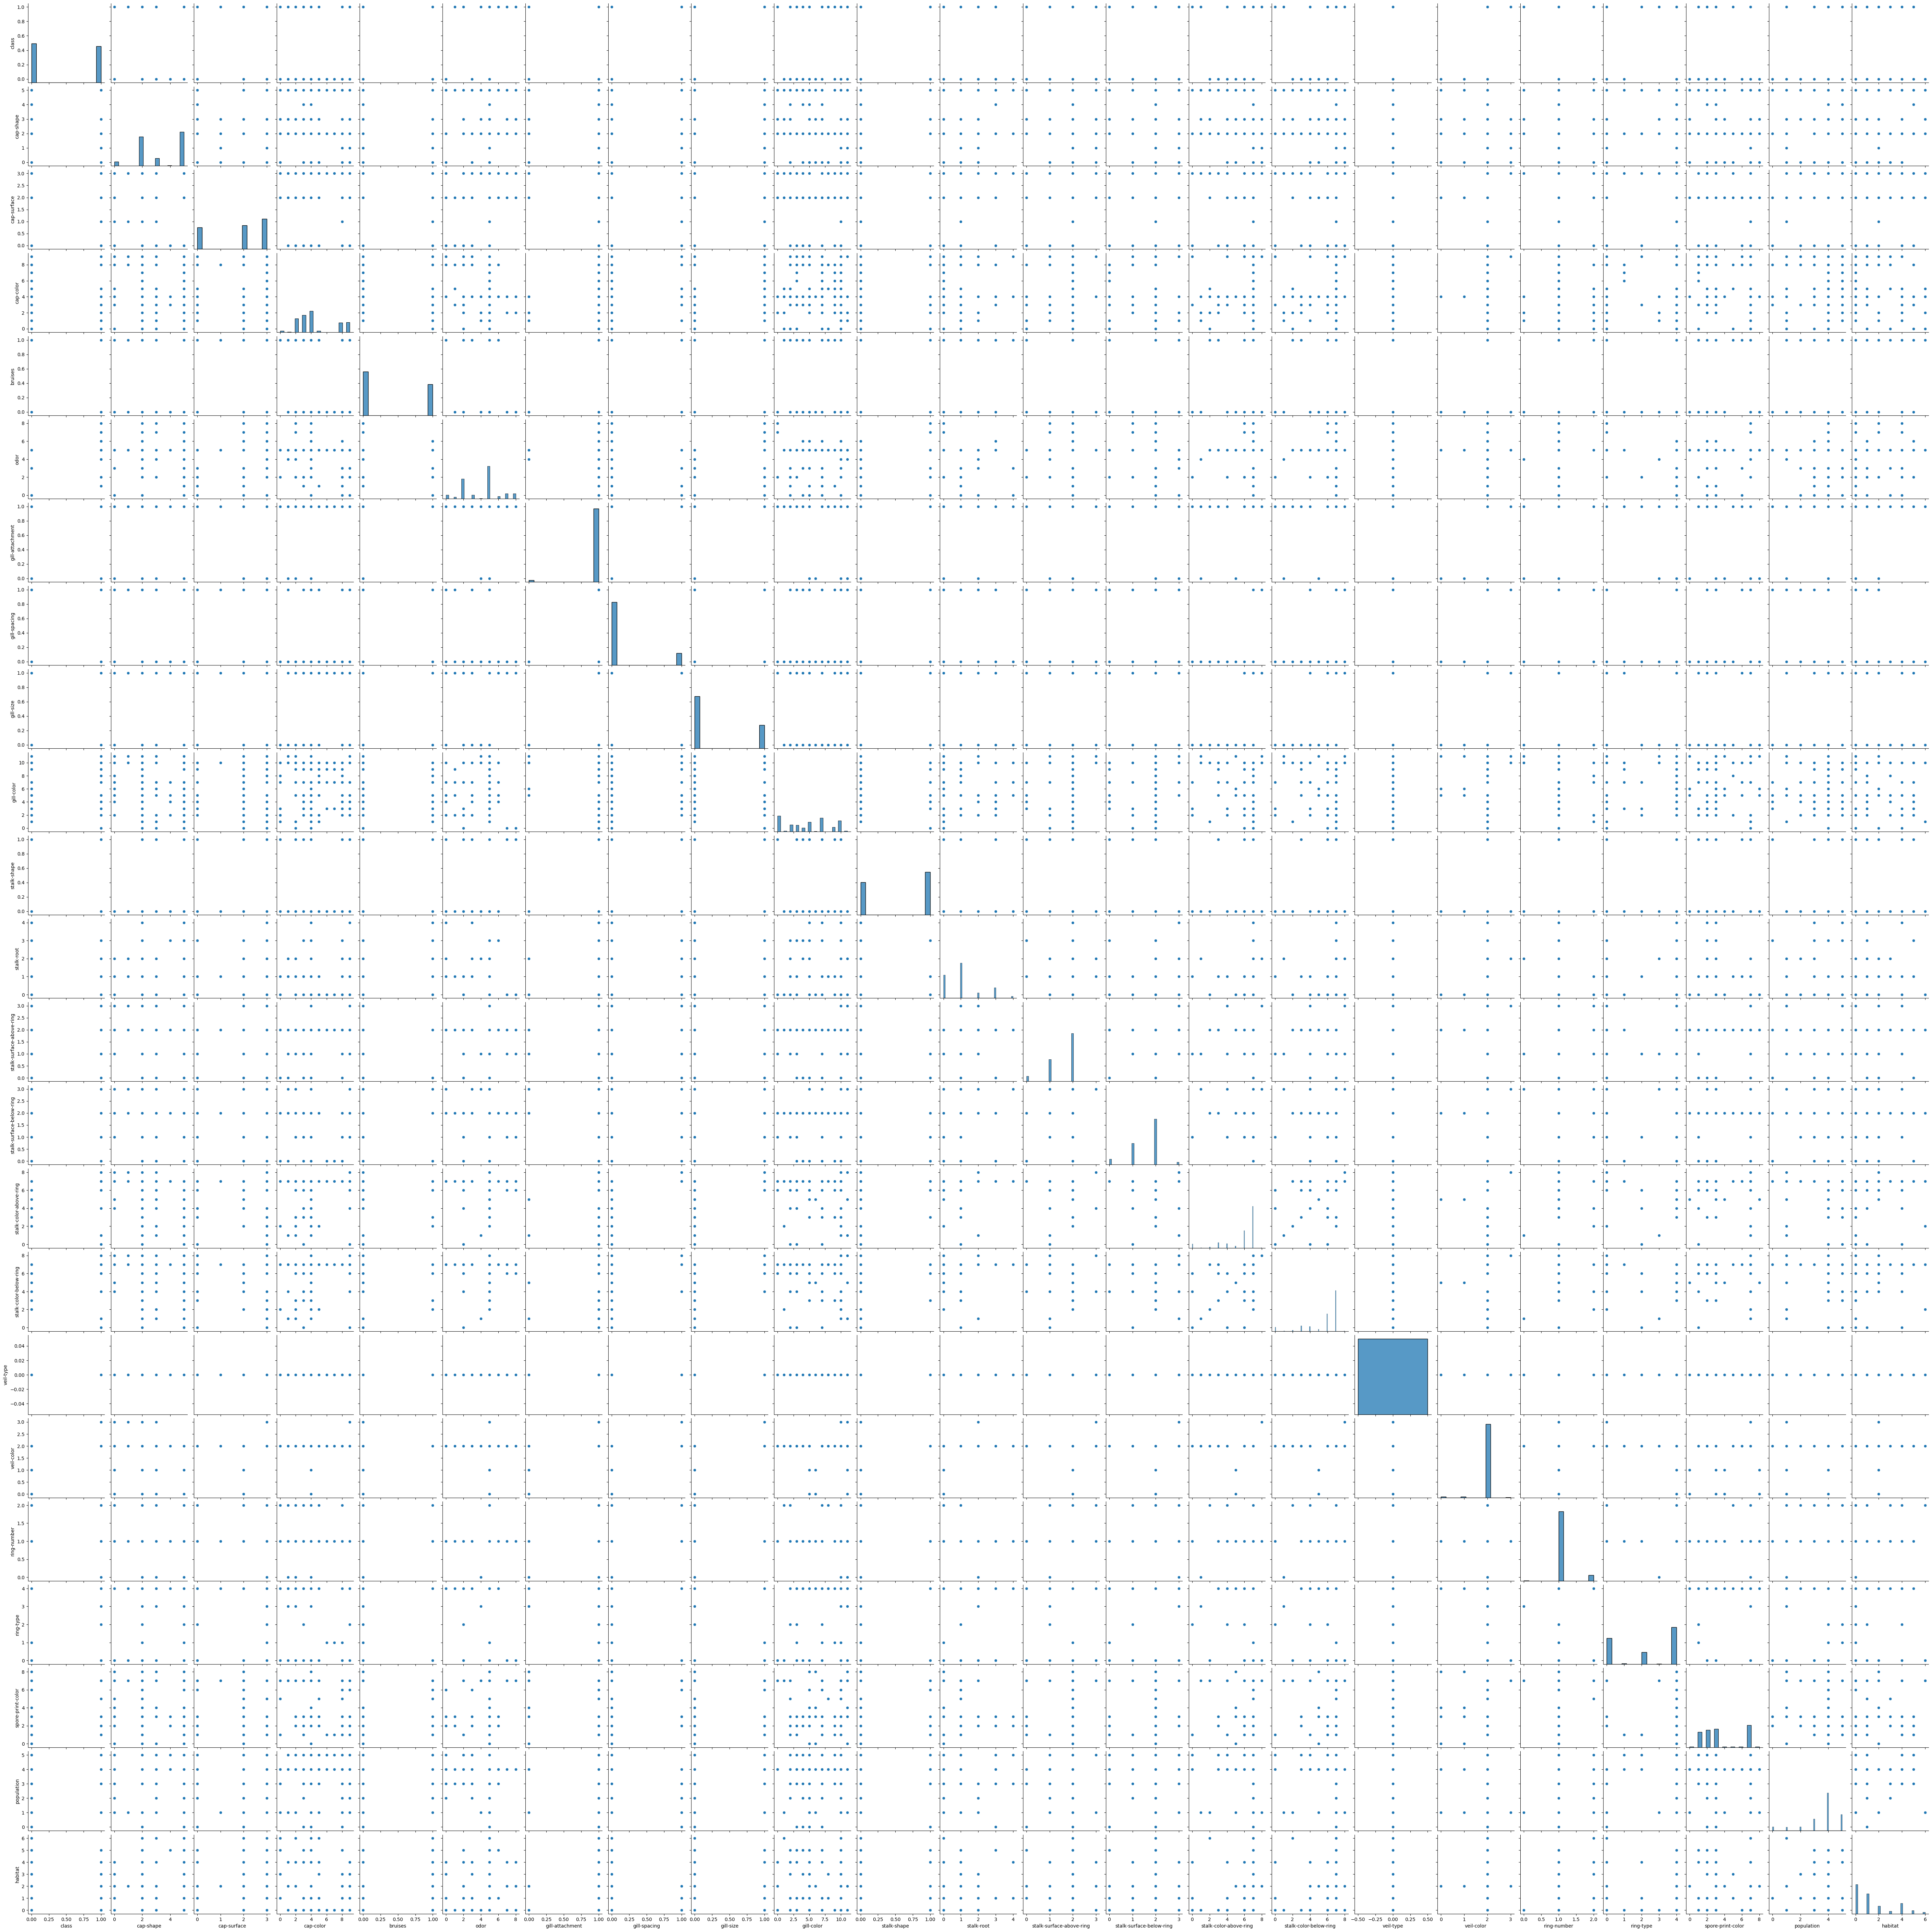

In [ ]:
sns.pairplot(data)

### Splitting into Training and Testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data.drop("class", axis=1), data["class"], test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6499, 22), (1625, 22), (6499,), (1625,))

### Model Building without Scaling

In [ ]:
params = {'linear', 'poly', 'rbf', 'sigmoid'}
for param in params:
  svc = SVC(kernel=param)
  svc.fit(x_train, y_train)
  print(f"{param} : {svc.score(x_test, y_test)}")


poly : 1.0
rbf : 0.9926153846153846
linear : 0.9729230769230769
sigmoid : 0.47507692307692306
